<div align="center">
<h1 style="color: red;">Highs (Scipy) && Simplex-Method (AMCP) comparision</h1>
</div>

## with MIPLIB benchmarks

In [1]:
from package.linker import *
from scipy.optimize import linprog
import time

path = path2mpc #см в package.helpers (указать свой путь до файла mpc)

n, time1, time2 = [], [], []

for key in banchDict.keys():
    rows, columns, rhs, bounds, integer_variables = parse_mps(path + key)
    
    sign = get_sign(rows)
    c = get_c(columns)
    b = get_b(rhs)
    A = get_A(columns, len(b), len(c))
    
    n.append(len(c))
    
    start_time = time.time()
    res = linprog(c, A_ub=A, b_ub=b, method='highs')
    end_time = time.time()
    time_scipy = end_time - start_time
    time1.append(time_scipy)
    
    
    start_time = time.time()
    point, fval = simplex_method(-c, A, b, sign)
    end_time = time.time()
    time_amcp = end_time - start_time
    time2.append(end_time - start_time)
    
    color_print(f'Бенчмарк: {key}\t\t{len(c)}-переменных(-ая)\n{'-'*55}', 'MAGENTA')
    print('\033[21mРешение с помощью м.highs (scipy):\033[0m\t\t\033[34m\033[21mMinimization\033[0m')
    print("Экстремальное значение целевой функции:", res.fun)
    #print("Оптимальные значения переменных x:", res.x) #Situationally
    print(f'Затраченное время: {time_scipy:.6f} c')
    print('\033[21mРешение с помощью симплекс-метода (amcp):\033[0m\t\t\033[34m\033[21mMinimization\033[0m')
    print("Экстремальное значение целевой функции:", -fval)
    #print("Оптимальные значения переменных x:", point) #Situationally
    print(f'Затраченное время: {time_amcp:.6f} c')
    print('\n')
    
    res = linprog(-c, A_ub=A, b_ub=b, method='highs')
    point, fval = simplex_method(c, A, b, sign)
    
    print('\033[21mРешение с помощью м.highs (scipy):\033[0m\t\t\033[31m\033[21mMaximization\033[0m')
    print("Экстремальное значение целевой функции:", res.fun)
    #print("Оптимальные значения переменных x:", res.x) #Situationally
    print('\033[21mРешение с помощью симплекс-метода (amcp):\033[0m\t\t\033[31m\033[21mMaximization\033[0m')
    if fval is None:
        print("Экстремальное значение целевой функции:", fval)
    else:
        print("Экстремальное значение целевой функции:", -fval)
    #print("Оптимальные значения переменных x:", point) #Situationally
    print('\n'*3)
    
    

Бенчмарк: mik-250-20-75-2.mps		271-переменных(-ая)
-------------------------------------------------------
Решение с помощью м.highs (scipy):		Minimization
Экстремальное значение целевой функции: -59987.19637402059
Затраченное время: 0.003983 c
Решение с помощью симплекс-метода (amcp):		Minimization
Экстремальное значение целевой функции: -59987.19637402059
Затраченное время: 0.031897 c


033Функционал не достигает экстремума в заданной области
Решение с помощью м.highs (scipy):		Maximization
Экстремальное значение целевой функции: None
Решение с помощью симплекс-метода (amcp):		Maximization
Экстремальное значение целевой функции: None




Бенчмарк: gen-ip002.mps		41-переменных(-ая)
-------------------------------------------------------
Решение с помощью м.highs (scipy):		Minimization
Экстремальное значение целевой функции: -3322.0351434558506
Затраченное время: 0.000996 c
Решение с помощью симплекс-метода (amcp):		Minimization
Экстремальное значение целевой функции: -3322.03514345584

<div align="center">
<h1 style="color:blue;">График зависимости скорости работы от числа переменных</h1>
</div>

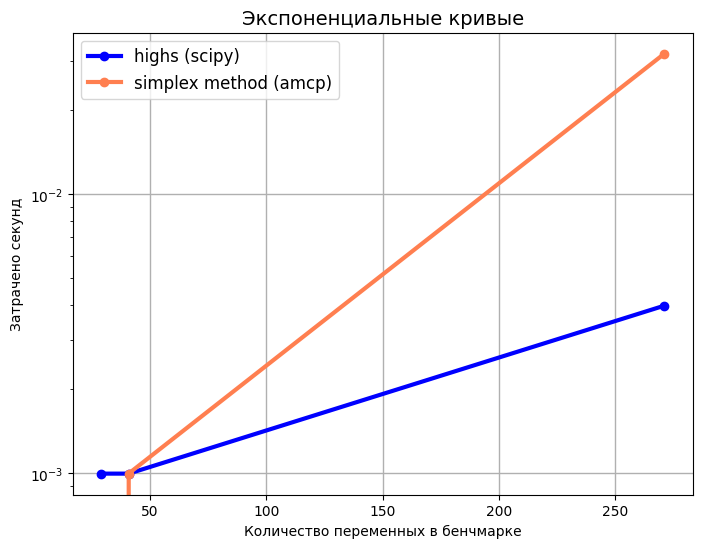

In [2]:
plot_comparasion(n, time1, time2)